In [11]:
import json
import os
from statistics import mean
from random import shuffle, seed
from glob import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datasets import load_dataset
import re

In [12]:

def Flatten(ll):
    l =[]
    for x in ll:
        for y in x:
            l.append(y)
    return l

In [13]:
def Word_in_line(line):
    l = []
    if "metaphor" in line.lower():
        l.append([2,line.lower().index("etaphor")])
    if "anomal" in line.lower():
        l.append([0,line.lower().index("anomal")])
    if "literal" in line.lower():
        l.append([1,line.lower().index("literal")])
    l.sort(key = lambda w:w[1])
    l = [x[0] for x in l]
    return l

def Sentence_in_line(line):
    l = []
    if "2)" in line.lower():
        l.append(1)
    if "3)" in line.lower():
        l.append(2)
    return l
    

def Parse_Cardillo_GPT4(output):
    output = output.replace("Sentence","\nSentence")
    output = output.split("\n")
    lines = [x for x in output if len(x)>0]
    output = [lines[0]]
    if "2)" in lines[0]:
        output = re.split(",|and |\. ",lines[0])
        output = [x.strip() for x in output]
        output = [x for x in output if len(x)>0]
    else:
        output.extend([x.lower() for x in lines[1:] if "entence" in x])
    #first line
    label = [Word_in_line(output[0]),[]]
    l = Sentence_in_line(output[0])
    if len(l)>0:
        print("Attention, il y a une sentence multiple ligne 0\n",l,output[0])
    try:
        l = Sentence_in_line(output[1])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne1\n",l,output[1])
        for i in l:
            label[i]=Word_in_line(output[1])
    except:
        print("no second line"+str(output))
    if len(label[0])==0:
        for x in output:
            if "sentence" in x.lower() and "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "sentence" in x.lower() and "1" in x and "metapho" in x.lower():
                label[0]=[2]
    if len(label[1])==0:
        for x in output:
            if "sentence" in x.lower() and "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "sentence" in x.lower() and "2" in x and "metapho" in x.lower():
                label[1]=[2]
    return label

def Parse_Triples_MetaLlama(output):
    output = output.strip().split("\n")
    output = [x for x in output if len(x)>0]
    label = [[],[],[]]
    if len(label[0])==0:
        for x in output:
            if "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "1" in x and "metapho" in x.lower():
                label[0]=[2]
            elif "1" in x and "anoma" in x.lower():
                label[0]=[0]
    if len(label[1])==0:
        for x in output:
            if  "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "2" in x and "metapho" in x.lower():
                label[1]=[2]
            elif "2" in x and "anoma" in x.lower():
                label[1]=[0]
    if len(label[2])==0:
        for x in output:
            if "3" in x and "literal" in x.lower():
                label[2]=[1]
            elif  "3" in x and "metapho" in x.lower():
                label[2]=[2]
            elif "3" in x and "anoma" in x.lower():
                label[2]=[0]
    return label

def Parse_Pairs_MetaLlama(output):
    output = output.strip().split("\n")
    output = [x for x in output if len(x)>0]
    label = [[],[]]
    if len(label[0])==0:
        for x in output:
            if "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "1" in x and "metapho" in x.lower():
                label[0]=[2]
    if len(label[1])==0:
        for x in output:
            if  "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "2" in x and "metapho" in x.lower():
                label[1]=[2]
    return label
    

def Parse_Triples_GPT4(output):
    output = output.replace("Sentence","\nSentence")
    output = output.split("\n")
    lines = [x for x in output if len(x)>0]
    output = [lines[0]]
    if "3)" in lines[0]:
        output = re.split(",|and |\. ",lines[0])
        output = [x.strip() for x in output]
        output = [x for x in output if len(x)>0]
    else:
        output.extend([x.lower() for x in lines[1:] if "entence" in x])
    #print(output)
    #first line
    label = [Word_in_line(output[0]),[],[]]
    l = Sentence_in_line(output[0])
    if len(l)>0:
        print("Attention, il y a une sentence multiple ligne 0\n",l,output[0])
    try:
        l = Sentence_in_line(output[1])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne 1\n",l,output[1])
        for i in l:
            label[i]=Word_in_line(output[1])
    except:
        print("no second line:\n"+str(output))
    try:
        l = Sentence_in_line(output[2])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne 2\n",l,output[2])
        for i in l:
            r =Word_in_line(output[2])
            label[i]=r
    except:
        print("no third line\n"+str(output))
    #print(label)
    if len(label[0])==0:
        for x in output:
            if "sentence" in x.lower() and "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "sentence" in x.lower() and "1" in x and "metapho" in x.lower():
                label[0]=[2]
            elif "sentence" in x.lower() and "1" in x and "anoma" in x.lower():
                label[0]=[0]
    if len(label[1])==0:
        for x in output:
            if "sentence" in x.lower() and "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "sentence" in x.lower() and "2" in x and "metapho" in x.lower():
                label[1]=[2]
            elif "sentence" in x.lower() and "2" in x and "anoma" in x.lower():
                label[1]=[0]
    if len(label[2])==0:
        for x in output:
            if "sentence" in x.lower() and "3" in x and "literal" in x.lower():
                label[2]=[1]
            elif "sentence" in x.lower() and "3" in x and "metapho" in x.lower():
                label[2]=[2]
            elif "sentence" in x.lower() and "3" in x and "anoma" in x.lower():
                label[2]=[0]
    return label

def Parse_Cardillo_Mix(output):
    output = output.replace("Answer:","").strip()
    output = output.replace("Sentence","\nSentence")
    output = output.split("\n")
    lines = [x for x in output if len(x)>0]
    output = [lines[0]]
    if "2)" in lines[0]:
        output = re.split(",|and |\. ",lines[0])
        output = [x.strip() for x in output]
        output = [x for x in output if len(x)>0]
    else:
        output.extend([x.lower() for x in lines[1:] if "entence" in x])
    #print("**********Processed Output: ")
    #print(output)
    #first line
    label = [Word_in_line(output[0]),[]]
    l = Sentence_in_line(output[0])
    if len(l)>0:
        print("Attention, il y a une sentence multiple ligne 0\n",l,output[0])
    try:
        l = Sentence_in_line(output[1])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne1\n",l,output[1])
        for i in l:
            label[i]=Word_in_line(output[1])
    except:
        print("no second line"+str(output))
    if len(label[0])==0:
        for x in output:
            if "sentence" in x.lower() and "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "sentence" in x.lower() and "1" in x and "metapho" in x.lower():
                label[0]=[2]
    if len(label[1])==0:
        for x in output:
            if "sentence" in x.lower() and "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "sentence" in x.lower() and "2" in x and "metapho" in x.lower():
                label[1]=[2]
    #print(label)
    return label



def Parse_Triples_Mix(output):
    output = output.replace("Answer:","").strip()
    output = output.replace("Sentence","\nSentence")
    output = output.split("\n")
    lines = [x for x in output if len(x)>0]
    output = [lines[0]]
    if "3)" in lines[0]:
        output = re.split(",|and |\. ",lines[0])
        output = [x.strip() for x in output]
        output = [x for x in output if len(x)>0]
    else:
        output.extend([x.lower() for x in lines[1:] if "entence" in x])
    #print(output)
    #first line
    label = [Word_in_line(output[0]),[],[]]
    l = Sentence_in_line(output[0])
    if len(l)>0:
        print("Attention, il y a une sentence multiple ligne 0\n",l,output[0])
    try:
        l = Sentence_in_line(output[1])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne 1\n",l,output[1])
        for i in l:
            label[i]=Word_in_line(output[1])
    except:
        print("no second line:\n"+str(output))
    try:
        l = Sentence_in_line(output[2])
        if len(l)>1:
            print("Attention, il y a une sentence multiple ligne 2\n",l,output[2])
        for i in l:
            r =Word_in_line(output[2])
            label[i]=r
    except:
        print("no third line\n"+str(output))
    #print(label)
    if len(label[0])==0:
        for x in output:
            if "sentence" in x.lower() and "1" in x and "literal" in x.lower():
                label[0]=[1]
            elif "sentence" in x.lower() and "1" in x and "metapho" in x.lower():
                label[0]=[2]
            elif "sentence" in x.lower() and "1" in x and "anoma" in x.lower():
                label[0]=[0]
    if len(label[1])==0:
        for x in output:
            if "sentence" in x.lower() and "2" in x and "literal" in x.lower():
                label[1]=[1]
            elif "sentence" in x.lower() and "2" in x and "metapho" in x.lower():
                label[1]=[2]
            elif "sentence" in x.lower() and "2" in x and "anoma" in x.lower():
                label[1]=[0]
    if len(label[2])==0:
        for x in output:
            if "sentence" in x.lower() and "3" in x and "literal" in x.lower():
                label[2]=[1]
            elif "sentence" in x.lower() and "3" in x and "metapho" in x.lower():
                label[2]=[2]
            elif "sentence" in x.lower() and "3" in x and "anoma" in x.lower():
                label[2]=[0]
    return label


def Look_Parse_Triples_GPT4(output):
    output = output.replace("Sentence","\nSentence")
    if len(output[0])>1:
        if "INST" in output[0]:
            output= re.split("INST",output[0])[1]
        else:
            output = output[0]
    output = output.split("\n")
    lines = [x for x in output if len(x)>0]
    output = [lines[0]]
    if "3)" in lines[0]:
        output = re.split(",|and ",lines[0])
        output = [x for x in output if len(x)>0]
    else:
        output.extend([x.lower() for x in lines[1:] if "entence" in x])
    print("Extracted lines:\n")
    for i,x in enumerate(output):
        print(i)
        print(x+"\n")
    #First line
    label = [Word_in_line(output[0]),[],[]]
    #Second line
    try:
        l = Sentence_in_line(output[1])
        for i in l:
            label[i]=Word_in_line(output[1])
    except:
        print("no second line:\n"+str(output))
    # Third line
    try:
        l = Sentence_in_line(output[2])
        for i in l:
            label[i] =Word_in_line(output[2])
    except:
        print("no third line\n"+str(output))
    print("Parsing output :",i,label)




In [14]:
def CheckParsedOutput(output,p,ds):
    print(ds)
    if "Cardillo" in ds:
        return Check_Parsed_Cardillo(output, p)
    else:
        return Check_Parsed_Triples(output, p)


def Check_Parsed_Cardillo(output, p):
    #print(p)
    okset = 0
    final_labels = []
    for i,x in enumerate(p):
        ok1,ok2 = 0,0
        setlabels = [None,None]
        if len(x[0])>=1 :
            ok1 = 1
            setlabels[0]=x[0][0]
        if len(x[1])>=1:
            ok2 = 1
            setlabels[1]=x[1][0]
        final_labels.append(setlabels)
        if ok1==1 and ok2==1:
            okset+=1
        else:
            print("Parsing Error \n\nOriginal output:\n",output["mixed"][i]["output"],'\n')
            print(x)
            print("index=========================",i)
            print("filename:",filename)
    flat = Flatten(final_labels)
    print("Correctly parsed set :",okset/len(p))
    print("Correctly parsed instances :",flat.count(None)/float(len(flat)))
    return final_labels

def Check_Parsed_Triples(output, p):
    #print(p)
    okset = 0
    final_labels = []
    for i,x in enumerate(p):
        #print(x)
        ok1,ok2,ok3 = 0,0,0
        setlabels = [None,None,None]
        if len(x[0])>=1 :
            ok1 = 1
            setlabels[0]=x[0][0]
        if len(x[1])>=1 :
            ok2 = 1
            setlabels[1]=x[1][0]
        if len(x[2])>=1 :
            ok3 = 1
            setlabels[2]=x[2][0]
        final_labels.append(setlabels)
        if ok1==1 and ok2==1 and ok3==1:
            okset+=1
        else:
            print("Parsing Error\n\nOriginal output:\n\n",output["mixed"][i]["output"],'\n')
            print(x)
            #Look_Parse_Triples_GPT4(output["mixed"][i]["output"])
    flat = Flatten(final_labels)
    print("Correctly parsed set :",okset/len(p))
    print("Correctly parsed instances :",flat.count(None)/float(len(flat)))
    return final_labels

In [15]:
def Parse_Cardillo(data,model):
    labels = []
    if model=="gpt-35-turbo":
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_GPT4(x["output"]))
    elif model=="gpt-35-turbo-instruct":
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_GPT4(x["output"]))
    elif model=="gpt-4":
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_GPT4(x["output"]))
    elif "Meta-Llama" in model:
        for x in data["mixed"]:
            #print("voula:", x["output"][0][len(x["input"]+"assistant"):])
            labels.append(Parse_Pairs_MetaLlama(x["output"][0].split("assistant")[-1]))
    elif "Llama" in model:
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_GPT4(x["output"][len(x["input"]):]))
    elif "flan" in model:
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_GPT4(x["output"]))
    elif "Mixtral-8x22B" in model:
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_Mix(x["output"].split("[/INST] Answer:")[1]))
    elif "Mixtral" in model:
        for x in data["mixed"]:
            labels.append(Parse_Cardillo_Mix(x["output"].split("[/INST]")[1]))
    return labels

def Parse_triples(data,model):
    labels = []
    if model=="gpt-35-turbo":
        for x in data["mixed"]:
            labels.append(Parse_Triples_GPT4(x["output"]))
    elif model=="gpt-35-turbo-instruct":
        for x in data["mixed"]:
            labels.append(Parse_Triples_GPT4(x["output"]))
    elif model=="gpt-4":
        for x in data["mixed"]:
            labels.append(Parse_Triples_GPT4(x["output"]))
    elif "Meta-Llama" in model:
        for x in data["mixed"]:
            #print("voula:", x["output"][0].split("assistant")[-1],"\n finito")
            labels.append(Parse_Triples_MetaLlama(x["output"][0].split("assistant")[-1]))
    elif "Llama" in model:
        for x in data["mixed"]:
            print("theinput  ",x["output"][len(x["input"]):],"\nfinito\n")
            labels.append(Parse_Triples_GPT4(x["output"][len(x["input"]):]))
    elif "flan" in model:
        for x in data["mixed"]:
            labels.append(Parse_Triples_GPT4(x["output"]))
    elif "Mixtral-8x22B" in model:
        for x in data["mixed"]:
            labels.append(Parse_Triples_Mix(x["output"].split("each sentence. Answer:")[1]))
    elif "Mixtral" in model:
        for x in data["mixed"]:
            labels.append(Parse_Triples_Mix(x["output"].split("[/INST]")[1]))
    return labels

In [16]:
datasets_pairs = [
                    "Pairs_Cardillo_set","Pairs_Jankowiac_set"
                    ]
datasets_quadruples = [
                    'Quadruples_Green_set'
                        ]


all_data ={}

for data in datasets_pairs:
    all_data[data] = load_dataset("Joanne/Metaphors_and_Analogies", data, split="test")
    
    
for data in datasets_quadruples:
    all_data[data] = load_dataset("Joanne/Metaphors_and_Analogies", data, split="test")

Using the latest cached version of the module from /home/joanne/.cache/huggingface/modules/datasets_modules/datasets/Joanne--Metaphors_and_Analogies/beea150ea6a22d819d08cdd41e16eca5d8f32c108cc19640e8a32d10cbe8579f (last modified on Thu Jun  8 12:24:30 2023) since it couldn't be found locally at Joanne/Metaphors_and_Analogies, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/joanne/.cache/huggingface/modules/datasets_modules/datasets/Joanne--Metaphors_and_Analogies/beea150ea6a22d819d08cdd41e16eca5d8f32c108cc19640e8a32d10cbe8579f (last modified on Thu Jun  8 12:24:30 2023) since it couldn't be found locally at Joanne/Metaphors_and_Analogies, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/joanne/.cache/huggingface/modules/datasets_modules/datasets/Joanne--Metaphors_and_Analogies/beea150ea6a22d819d08cdd41e16eca5d8f32c108cc19640e8a32d10cbe8579f (last modified on Thu Jun  8 12:24:30 2023) since it cou

In [17]:
Word_in_line("Sentence 3) is a metaphor - The sentence suggests a foundational or supportive relationship between a launchpad and a helicopter, similar to the relationship between a thorn and a rose, but it is not a direct or literal comparison.")

[2, 1]

In [18]:
post_edit={
    #"gpt-3.5-turbo.Metaphors_and_Analogies_Pairs_Cardillo_set_test.3.1.json":
    #    {181:[1,2]}
}

In [180]:
data["mixed"][0]["output"]

TypeError: string indices must be integers

In [20]:
utilite = {}

for i in glob("../output/3_datasets_permutation/*.json"):
    filename = os.path.basename(i)
    permutation = filename.split('.')[-2]
    model = filename.split(".")[0]
    with open(i, "r") as f:
        data = json.load(f)
    if 1:#"Mix" in model:#"Llama" in model or "gpt" in model:#and not "instruct" in model:
        print("===============================",permutation,model,'=======================================\n')
        if "Cardillo" in filename:
            mydata = "Pairs_Cardillo_set"
            parsed_output = Parse_Cardillo(data,model)
        elif "Green" in filename:
            mydata = "Quadruples_Green_set"
            parsed_output = Parse_triples(data,model)
        elif "Jankowiac" in filename:
            mydata =  "Pairs_Jankowiac_set"
            parsed_output = Parse_triples(data,model)
        final_labels = CheckParsedOutput(data,parsed_output,mydata)
        if filename in post_edit:
            for i in post_edit[filename]:
                print("Post Edits : ",final_labels[i],"--->",post_edit[filename][i])
                final_labels[i]=post_edit[filename][i]
        accuracy = {"trial": permutation, "data": mydata, "model":model,"true":data["labels"],"prediction":final_labels}
        if not mydata in utilite:
            utilite[mydata]={}
        if not model in utilite[mydata]:
            utilite[mydata][model] = []
        utilite[mydata][model].append(accuracy)

    

=============================== 120 flan-t5-xxl =======================================

Quadruples_Green_set
Correctly parsed set : 1.0
Correctly parsed instances : 0.0
=============================== 12 Mixtral-8x7B-Instruct-v01 =======================================

Pairs_Cardillo_set
Parsing Error 

Original output:
  [INST] I will give you two sentences and I would like you to tell me which one is "literal" and which one is a "metaphor". There is exactly one metaphor and one literal sentence among the two provided sentences. Here are the two sentences:
1) The dry plant was a tumbleweed.
2) The foster child was a tumbleweed.

Please provide the answer in separate lines for each sentence.[/INST] Answer: Sentence 1) is a metaphor.

Explanation: A literal sentence would be a statement that states a fact or describes a situation directly and literally. A metaphor is a figure of speech that makes a comparison between two things that are not alike but have something in common.

1) The 

In [21]:
for x in utilite["Quadruples_Green_set"]["Llama-2-70b-chat-hf"]:#["Mixtral-8x22B-Instruct-v01"]:
    print(x["trial"])
    print(x["prediction"])
#utilite["Quadruples_Green_set"]["Meta-Llama-3-70B-Instruct"]

012
[[0, 1, 2], [1, 0, 2], [2, 1, 0], [0, 1, 2], [2, 1, 0], [1, 0, 2], [2, 1, 0], [0, 2, 1], [2, 1, 0], [2, 1, 0], [0, 1, 2], [1, 0, 2], [0, 1, 2], [1, 0, 2], [0, 1, 2], [0, 1, 2], [2, 1, 0], [0, 1, 2], [0, 1, 2], [2, 1, 0], [0, 1, 2], [1, 0, 2], [0, 1, 2], [1, 0, 2], [0, 1, 2], [2, 1, 0], [0, 1, 2], [2, 1, 0], [0, 1, 2], [0, 1, 2], [0, 1, 2], [2, 1, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [0, 1, 2], [1, 2, 0], [1, 0, 2], [0, 1, 2], [1, 2, 0]]
120
[[1, 2, 0], [1, 0, 2], [2, 0, 1], [1, 2, 0], [1, 0, 2], [1, 2, 0], [1, 0, 2], [2, 1, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [0, 2, 1], [1, 0, 2], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 0, 2], [2, 1, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 2, 0], [1, 0, 2], [1, 0, 2], [1, 0, 2], [2, 1, 0], [1, 0, 2], [1, 2, 0], [2, 1, 0], [2, 0, 1], [1, 2, 0], [0, 1, 2], [1, 0, 2]]
102
[[1, 0, 2], [1, 0, 2], [2, 0, 1], [1, 0, 2], [1, 0, 2], [1, 2, 0], [1, 0, 2], [2, 1, 0], [1, 2, 0], [1, 0,

In [22]:
for x in utilite:
    for y in utilite[x]:
        print(len(utilite[x][y]))


6
6
6
6
6
6
6
6
2
2
2
2
2
2
2
2
6
6
6
6
6
6
6
6


In [23]:

pred = []
trues = []
for run in utilite['Quadruples_Green_set']["gpt-4"]:
    print(Flatten(run["true"]).count(0),Flatten(run["true"]).count(1),Flatten(run["true"]).count(2))
    pred.extend(Flatten(run["prediction"]))
    trues.extend(Flatten(run["true"]))

trues.count(0),trues.count(1),trues.count(2)

40 40 40
40 40 40
40 40 40
40 40 40
40 40 40
40 40 40


(240, 240, 240)

# Confusion Matrices

In [28]:
def Manual_error_count(r):
    pt = {"02":0,"20":0,"21":0,"12":0,"01":0,"10":0,"40":0,"04":0,"42":0,"24":0,"14":0,"41":0}
    for i,x in enumerate(r["prediction"]):
        p=r["prediction"][i]
        t = r["true"][i]
        if p!=t:
            pt[str(p)+str(t)]+=1
    for x in pt:
        if pt[x]>0:
            1
            #print(x,pt[x])
    #print("metaphor-anomaly errors:")
    print("02",pt["02"]+pt["20"])
    #print("literal-anomaly errors:")
    print("01",pt["01"]+pt["10"])
    print("12",pt["21"]+pt["12"])

In [29]:
def FilterUndefined(r):
    filtered = {"prediction":[],"true":[]}
    undefined = [i for i,e in enumerate(r["prediction"]) if e is None ]
    for i,x in enumerate(r["prediction"]):
        if not i in undefined:
            filtered["prediction"].append(r["prediction"][i])
            filtered["true"].append(r["true"][i])
    return filtered,len(undefined),len(undefined)/len(r["true"])

def ResultsAllInstances(r):
    n = 0
    newlist = {"prediction":[],"true":r["true"]}
    for i,e in enumerate(r["prediction"]):
        if e is None:
            newlist["prediction"].append(4)
            n+=1
        else:
            newlist["prediction"].append(e)
    return newlist,n,n/len(r["true"])

================================ Quadruples_Green_set   flan-t5-xxl  Predicted -> True ============================

**********Undefined : 0 0.0
Errors all results

02 220
01 15
12 214
Errors defined results

02 220
01 15
12 214
              precision    recall  f1-score   support

           0       0.52      0.23      0.32       240
           1       0.70      0.08      0.14       240
           2       0.34      0.82      0.48       240

    accuracy                           0.38       720
   macro avg       0.52      0.38      0.31       720
weighted avg       0.52      0.38      0.31       720



FileNotFoundError: [Errno 2] No such file or directory: 'generation_confusion_matrices/only_defined_all_trials_confusion_matrix_zeroshot_generation_by_setflan-t5-xxl_Quadruples_Green_set.png'

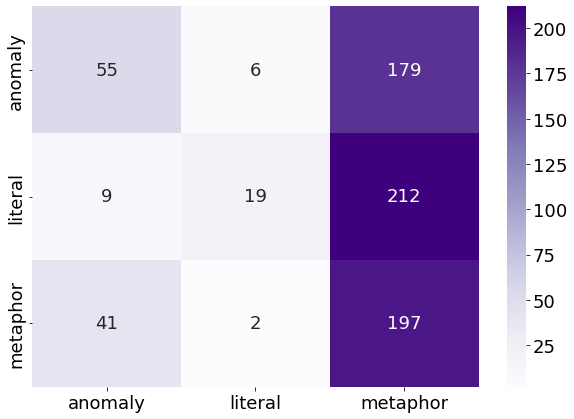

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import (
                          f1_score,
                          precision_recall_fscore_support,
                          accuracy_score,
                          balanced_accuracy_score,
                          precision_score,
                          recall_score,
                          classification_report
)

from sklearn import metrics
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

s = open("generation_permutation_models_accuracy.csv","w")
s.write("Data\tModel\tAcc.\tUndef.answer\n")
label_distribution = {}
set_distribution = {}
for dataset in utilite:
    label_distribution[dataset]={}
    set_distribution[dataset] = {}
    for model in utilite[dataset]:
        label_distribution[dataset][model]={}
        set_distribution[dataset][model] = {}
        print("================================",dataset," ", model, " Predicted -> True ============================\n")
        myres = {"prediction":[],"true":[]}
        for run in utilite[dataset][model]:
            myres["prediction"].extend(Flatten(run["prediction"]))
            myres["true"].extend(Flatten(run["true"]))
            for seti in run["prediction"]:
                if not str(seti) in set_distribution[dataset][model]:
                    set_distribution[dataset][model][str(seti)]=0
                set_distribution[dataset][model][str(seti)]+=1
        label_distribution[dataset][model][0]=myres["prediction"].count(0)
        label_distribution[dataset][model][1]=myres["prediction"].count(1)
        label_distribution[dataset][model][2]=myres["prediction"].count(2)
        
        only_defined_res,n_undefined,percent_undefined = FilterUndefined(myres)
        all_res,n_undefined,percent_undefined = ResultsAllInstances(myres)
        print("**********Undefined :",n_undefined,percent_undefined)
        print("Errors all results\n")
        Manual_error_count(all_res)
        print("Errors defined results\n")
        Manual_error_count(only_defined_res)
        print(classification_report(only_defined_res["true"],only_defined_res["prediction"]))
        s.write(dataset+"\t"+model+"\t"+str(round(accuracy_score(only_defined_res["true"],only_defined_res["prediction"])*100,1))+"\t"+str(round(100*percent_undefined,1))+"\n")
        # Without undefined
        if not "Cardillo" in dataset:
            cm = metrics.confusion_matrix(only_defined_res["true"],only_defined_res["prediction"])
            df_cm = pd.DataFrame(cm, index = ["anomaly","literal","metaphor"], columns = ["anomaly","literal","metaphor"])
            plt.figure(figsize = (10,7))
            sn.heatmap(df_cm, annot=True, cmap='Purples', fmt='g')
            #plt.title(dataset+" "+model+"_undefined_excluded_n="+str(n_undefined)+"_"+str(percent_undefined))
            plt.savefig("generation_confusion_matrices/only_defined_all_trials_confusion_matrix_zeroshot_generation_by_set"+model+"_"+dataset+".png")
        else:
            cm = metrics.confusion_matrix(only_defined_res["true"],only_defined_res["prediction"])
            df_cm = pd.DataFrame(cm, index = ["literal","metaphor"], columns = ["literal","metaphor"])
            plt.figure(figsize = (10,7))
            sn.heatmap(df_cm, annot=True, cmap='Purples', fmt='g')
            #plt.title(dataset+" "+model+"_undefined_excluded_n="+str(n_undefined)+"_"+str(percent_undefined))
            plt.savefig("generation_confusion_matrices/only_defined_all_trials_confusion_matrix_zeroshot_generation_by_set"+model+"_"+dataset+".png")
s.close()

In [31]:
s = open("rien-generation_permutation_models_accuracy.csv","w")
s.write("Data\tModel\tAcc.\tUndef.answer\n")
label_distribution = {}
set_distribution = {}
for dataset in utilite:
    label_distribution[dataset]={}
    set_distribution[dataset] = {}
    for model in utilite[dataset]:
        label_distribution[dataset][model]={}
        set_distribution[dataset][model] = {}
        print("================================",dataset," ", model,"=================\n")
        myres = {"prediction":[],"true":[]}
        for run in utilite[dataset][model]:
            myres["prediction"].extend(Flatten(run["prediction"]))
            myres["true"].extend(Flatten(run["true"]))
            for seti in run["prediction"]:
                if not str(seti) in set_distribution[dataset][model]:
                    set_distribution[dataset][model][str(seti)]=0
                set_distribution[dataset][model][str(seti)]+=1
        label_distribution[dataset][model][0]=myres["prediction"].count(0)
        label_distribution[dataset][model][1]=myres["prediction"].count(1)
        label_distribution[dataset][model][2]=myres["prediction"].count(2)
        
        only_defined_res,n_undefined,percent_undefined = FilterUndefined(myres)
        all_res,n_undefined,percent_undefined = ResultsAllInstances(myres)
        #print("**********Undefined :",n_undefined,percent_undefined)
        print("Errors defined results\n")
        Manual_error_count(only_defined_res)
        

================================ Quadruples_Green_set   flan-t5-xxl =================

Errors defined results

02 220
01 15
12 214
================================ Quadruples_Green_set   Llama-2-70b-chat-hf =================

Errors defined results

02 111
01 92
12 86
================================ Quadruples_Green_set   Mixtral-8x22B-Instruct-v01 =================

Errors defined results

02 153
01 35
12 37
================================ Quadruples_Green_set   Mixtral-8x7B-Instruct-v01 =================

Errors defined results

02 123
01 60
12 130
================================ Quadruples_Green_set   gpt-35-turbo =================

Errors defined results

02 140
01 143
12 137
================================ Quadruples_Green_set   gpt-4 =================

Errors defined results

02 48
01 14
12 92
================================ Quadruples_Green_set   gpt-35-turbo-instruct =================

Errors defined results

02 165
01 136
12 140
================================ Quadruples

In [156]:
head = ["dataset","model","lit.","met.","ano."]
print("\t".join(head))
for x in label_distribution:
    for y in label_distribution[x]:
        if "Card" in x:
            t = label_distribution[x][y][1]+label_distribution[x][y][2]
            print(x,"\t",y,'\t\t\t',round(100*label_distribution[x][y][1]/t,1),'\t',round(100*label_distribution[x][y][2]/t,1))
        else:
            t = label_distribution[x][y][1]+label_distribution[x][y][2]+label_distribution[x][y][0]
            print(x,"\t",y,'\t\t\t',round(100*label_distribution[x][y][1]/t,1),'\t',round(100*label_distribution[x][y][2]/t,1),"\t",round(100*label_distribution[x][y][0]/t,1))

dataset	model	lit.	met.	ano.
Quadruples_Green_set 	 flan-t5-xxl 			 3.8 	 81.7 	 14.6
Quadruples_Green_set 	 Llama-2-70b-chat-hf 			 34.2 	 34.8 	 30.9
Quadruples_Green_set 	 Mixtral-8x22B-Instruct-v01 			 34.2 	 34.4 	 31.4
Quadruples_Green_set 	 Mixtral-8x7B-Instruct-v01 			 31.9 	 34.0 	 34.1
Quadruples_Green_set 	 gpt-35-turbo 			 33.2 	 33.2 	 33.6
Quadruples_Green_set 	 gpt-4 			 33.3 	 33.3 	 33.3
Quadruples_Green_set 	 gpt-35-turbo-instruct 			 33.3 	 33.5 	 33.2
Quadruples_Green_set 	 Meta-Llama-3-70B-Instruct 			 32.6 	 34.0 	 33.3
Pairs_Cardillo_set 	 Mixtral-8x7B-Instruct-v01 			 48.5 	 51.5
Pairs_Cardillo_set 	 Meta-Llama-3-70B-Instruct 			 48.5 	 51.5
Pairs_Cardillo_set 	 gpt-35-turbo 			 50.0 	 50.0
Pairs_Cardillo_set 	 flan-t5-xxl 			 45.3 	 54.7
Pairs_Cardillo_set 	 Mixtral-8x22B-Instruct-v01 			 49.3 	 50.7
Pairs_Cardillo_set 	 Llama-2-70b-chat-hf 			 50.0 	 50.0
Pairs_Cardillo_set 	 gpt-4 			 49.7 	 50.3
Pairs_Cardillo_set 	 gpt-35-turbo-instruct 			 48.6 	 51.4
Pair

In [157]:
for x in set_distribution["Pairs_Jankowiac_set"]["flan-t5-xxl"]:
    print(x,set_distribution["Pairs_Jankowiac_set"]["flan-t5-xxl"][x])

[0, 2, 1] 246
[0, 2, 2] 163
[0, 1, 2] 70
[2, 2, 2] 37
[2, 2, 1] 16
[2, 0, 1] 5
[2, 1, 2] 24
[2, 0, 2] 18
[1, 2, 0] 53
[1, 2, 1] 3
[1, 2, 2] 56
[2, 2, 0] 11
[0, None, None] 1
[2, 1, 0] 6
[1, 0, 2] 11


In [158]:
s = open("set_label_distribution.csv",'w')

triples = list(set_distribution["Pairs_Jankowiac_set"]["gpt-4"].keys())
pairs = list(set_distribution["Pairs_Cardillo_set"]["gpt-4"].keys())
models = list(set_distribution["Pairs_Jankowiac_set"].keys())
models.sort()
triples.append("[2, 2, 2]")
triples.append("[1, 1, 1]")
triples.append("[1, 2, 2]")
triples.append("[0, 2, 2]")
pairs.append("[1, 1]")
print("-\t-\t"+"\t".join(triples))
s.write("-\t-\t"+"\t".join(triples)+'\n')
total = {}
for x in set_distribution:
    if not "Card" in x:
        total[x]={}
        for y in models:
            total[x][y]=0
            t = []
            for z in set_distribution[x][y] :
                total[x][y]+=set_distribution[x][y][z]
            for z in triples:
                try:
                    t.append(str(round(set_distribution[x][y][z]*100/total[x][y],1)))
                except:
                    t.append("0")
            print(x+"\t"+y+"\t"+str("\t".join(t)))
            s.write(x+"\t"+y+"\t"+str("\t".join(t))+"\n")

print("-\t-\t"+"\t".join(pairs))
s.write("-\t-\t"+"\t".join(pairs)+"\n")
total = {}
for x in set_distribution:
    if "Card" in x:
        for y in models:
            total[y]=0
            t = []
            for z in set_distribution[x][y]:
                total[y]+=set_distribution[x][y][z]
            for z in pairs:
                try:
                    t.append(str(round(set_distribution[x][y][z]*100/total[y],1)))
                except:
                    t.append("0")
            print(x+"\t"+y+"\t"+str("\t".join(t)))
            s.write(x+"\t"+y+"\t"+str("\t".join(t))+"\n")


s.close()

-	-	[2, 1, 0]	[2, 0, 1]	[0, 1, 2]	[1, 0, 2]	[2, 0, 2]	[1, 2, 0]	[2, 2, 0]	[0, 2, 1]	[2, 2, 1]	[2, 2, 2]	[1, 1, 1]	[1, 2, 2]	[0, 2, 2]
Quadruples_Green_set	Llama-2-70b-chat-hf	16.2	6.2	14.6	24.2	0	17.9	0	4.2	0	0	0	0	0
Quadruples_Green_set	Meta-Llama-3-70B-Instruct	23.8	39.6	14.6	0.8	0.4	0.8	0.8	18.3	0	0	0	0	0.8
Quadruples_Green_set	Mixtral-8x22B-Instruct-v01	33.3	19.6	1.7	12.9	0	16.2	0	0.4	0.4	0	0	0	0
Quadruples_Green_set	Mixtral-8x7B-Instruct-v01	42.5	35.0	4.6	0.8	0.4	2.1	0.8	6.2	0	0	0	0	0
Quadruples_Green_set	flan-t5-xxl	0	0	0.4	0	0	0.4	0	7.5	0	53.3	0	2.5	35.4
Quadruples_Green_set	gpt-35-turbo	73.3	3.3	7.9	0.4	0	8.8	0	5.0	0	0	0	0	0
Quadruples_Green_set	gpt-35-turbo-instruct	75.8	17.1	0.4	1.2	0	4.6	0	0.4	0.4	0	0	0	0
Quadruples_Green_set	gpt-4	19.6	28.8	21.2	9.2	0	7.5	0	13.8	0	0	0	0	0
Pairs_Jankowiac_set	Llama-2-70b-chat-hf	8.5	6.4	34.0	15.3	0	12.9	0	22.8	0	0	0	0	0
Pairs_Jankowiac_set	Meta-Llama-3-70B-Instruct	19.2	18.6	14.6	12.1	0.4	13.6	1.2	16.7	1.2	0	0	0	1.1
Pairs_Jankowiac_set	Mixtr

In [45]:
dirl = "/home/joanne/Desktop/Benchmark/metaphor_benchmark/UBMI/PsychoLing_ScCo/Cardillo/cardillo_n/random_split"
train = json.load(open(dirl+"/train.json"))
val = json.load(open(dirl+"/validation.json"))
test = json.load(open(dirl+"/test.json"))
card = train+val+test
len(card)

512

In [130]:
image_auditory = []
image_visual = []
image_motor = []
conc_average = []
conc_mod1 = []
conc_noun1 = []
conc_mod2 = []
conc_noun2 = []
interpretability = []
figurativeness = []
imageability = []
familiarity = []
naturalness =[]
for x in card:
    a = x["additionalInformation"]
    try:
        image_auditory.append(a["image"]["auditory"])
    except:
        pass
    try:
        image_visual.append(a["image"]["visual"])
    except:
        pass
    try:
        image_motor.append(a["image"]["motor"])
    except:
        pass
    conc_average.append(a["Concreteness"]['average'])
    conc_mod1.append(a["Concreteness"]['mod1'])
    conc_noun1.append(a["Concreteness"] ['noun1'])
    conc_mod2.append(a["Concreteness"]['mod2'])
    conc_noun2.append(a["Concreteness"]['noun2'])
    if a["intepretability"] !="n/a":
        interpretability.append(a["intepretability"])
    figurativeness.append(a["figurativeness"])
    familiarity.append(a["familiarity"])
    naturalness.append(a["naturalness"])
    imageability.append(a["imageability"])
     

In [131]:
q = [image_auditory,
image_visual,
image_motor,
conc_average,
conc_mod1,
conc_noun1,
conc_mod2,
conc_noun2,
interpretability,
figurativeness,
imageability,
familiarity,
naturalness]


r = {
    "image_auditory":image_auditory,
    "image_visual":image_visual,
    "image_motor":image_motor,
    "conc_average":conc_average,
    "conc_mod1":conc_mod1,
    "conc_noun1":conc_noun1,
    "conc_mod2":conc_mod2,
    "conc_noun2":conc_noun2,
    "interpretability":interpretability,
    "figurativeness":figurativeness,
    "imageability":imageability,
    "familiarity":familiarity,
    "naturalness":naturalness
    }

for p in r:
    r[p] = [y for y in r[p] if len(y)>0]
    r[p] = [y for y in r[p] if y!="-"]
    r[p] = [float(y) for y in r[p]]

In [132]:
c = {}
for x in card:
    c[x["context"]]=x

In [133]:
def Errordic(ed,a):
    try:
        ed["image_auditory"].append(a["image"]["auditory"])
    except:
        pass
    try:
        ed["image_visual"].append(a["image"]["visual"])
    except:
        pass
    try:
        ed["image_motor"].append(a["image"]["motor"])
    except:
        pass
    ed["conc_average"].append(a["Concreteness"]['average'])
    ed["conc_mod1"].append(a["Concreteness"]['mod1'])
    ed["conc_noun1"].append(a["Concreteness"] ['noun1'])
    ed["conc_mod2"].append(a["Concreteness"]['mod2'])
    ed["conc_noun2"].append(a["Concreteness"]['noun2'])
    if a["intepretability"] !="n/a":
        ed["interpretability"].append(a["intepretability"])
    ed["figurativeness"].append(a["figurativeness"])
    ed["familiarity"].append(a["familiarity"])
    ed["naturalness"].append(a["naturalness"])
    ed["imageability"].append(a["imageability"])
    return ed

In [140]:
utilite['Pairs_Cardillo_set'].keys()

dict_keys(['Mixtral-8x7B-Instruct-v01', 'Meta-Llama-3-70B-Instruct', 'gpt-35-turbo', 'flan-t5-xxl', 'Mixtral-8x22B-Instruct-v01', 'Llama-2-70b-chat-hf', 'gpt-4', 'gpt-35-turbo-instruct'])

In [207]:
import copy
import numpy as np
from scipy.stats import ttest_ind
import statistics

for model in utilite['Pairs_Cardillo_set'].keys():
    doomM = {
        "image_auditory":[],
        "image_visual":[],
        "image_motor":[],
        "conc_average":[],
        "conc_mod1":[],
        "conc_noun1":[],
        "conc_mod2":[],
        "conc_noun2":[],
        "interpretability":[],
        "figurativeness":[],
        "imageability":[],
        "familiarity":[],
        "naturalness":[]
        }
    
    doomL = {
        "image_auditory":[],
        "image_visual":[],
        "image_motor":[],
        "conc_average":[],
        "conc_mod1":[],
        "conc_noun1":[],
        "conc_mod2":[],
        "conc_noun2":[],
        "interpretability":[],
        "figurativeness":[],
        "imageability":[],
        "familiarity":[],
        "naturalness":[]
        }
    ouiL = copy.deepcopy(doomL)
    ouiM = copy.deepcopy(doomM)
    for trial in utilite['Pairs_Cardillo_set'][model]:
        if trial["trial"]=="12":
            for i in range(len(trial["true"])):
                if trial["true"][i]!=trial["prediction"][i]:
                    #print()
                    sentences= all_data['Pairs_Cardillo_set'][i]["sentences"]
                    print(all_data['Pairs_Cardillo_set'][i]["labels"],sentences)
                    il = all_data['Pairs_Cardillo_set'][i]["labels"].index(1)
                    im = all_data['Pairs_Cardillo_set'][i]["labels"].index(2)
                    try:
                        doomL = Errordic(doomL,c[sentences[il]]["additionalInformation"])
                        doomM = Errordic(doomM,c[sentences[im]]["additionalInformation"])
                    except:
                        try:
                            doomL = Errordic(doomL,c[sentences[il]+" "]["additionalInformation"])
                            doomM = Errordic(doomM,c[sentences[im]+" "]["additionalInformation"])
                        except:
                            #print(sentences[il])
                            o = 1
                    try:
                        print(model,"auditory",c[sentences[il]]["additionalInformation"]["image"]["auditory"])
                        print(model,"visual",c[sentences[il]]["additionalInformation"]["image"]["visual"])
                    except:
                        pass
                    #print(c[sentences[il]]["additionalInformation"]["image"]["motor"])
                else:
                    #print()
                    sentences= all_data['Pairs_Cardillo_set'][i]["sentences"]
                    #print(all_data['Pairs_Cardillo_set'][i]["labels"],sentences)
                    il = all_data['Pairs_Cardillo_set'][i]["labels"].index(1)
                    im = all_data['Pairs_Cardillo_set'][i]["labels"].index(2)
                    try:
                        ouiL = Errordic(ouiL,c[sentences[il]]["additionalInformation"])
                        ouiM = Errordic(ouiM,c[sentences[im]]["additionalInformation"])
                    except:
                        try:
                            ouiL = Errordic(ouiL,c[sentences[il]+" "]["additionalInformation"])
                            ouiM = Errordic(ouiM,c[sentences[im]+" "]["additionalInformation"])
                        except:
                            #print(sentences[il])
                            o = 1
                
                
    for rating in doomL:
        #try:
        doomL[rating]=[y for y in doomL[rating] if len(y)>0]
        doomL[rating] = [y for y in doomL[rating] if y!="-"]
        doomL[rating] = [float(y) for y in doomL[rating]]
    
    for rating in doomM:
        #try:
        doomM[rating]=[y for y in doomM[rating] if len(y)>0]
        doomM[rating] = [y for y in doomM[rating] if y!="-"]
        doomM[rating] = [float(y) for y in doomM[rating]]
        
    for rating in ouiL:
        #try:
        ouiL[rating]=[y for y in ouiL[rating] if len(y)>0]
        ouiL[rating] = [y for y in ouiL[rating] if y!="-"]
        ouiL[rating] = [float(y) for y in ouiL[rating]]
    
    for rating in ouiM:
        #try:
        ouiM[rating]=[y for y in ouiM[rating] if len(y)>0]
        ouiM[rating] = [y for y in ouiM[rating] if y!="-"]
        ouiM[rating] = [float(y) for y in ouiM[rating]]
        
    rat = ["image_auditory","image_visual"]
    pvalue_aud = round(ttest_ind(doomM[rat[0]],ouiM[rat[0]]).pvalue,4)
    pvalue_im = round(ttest_ind(doomM[rat[1]],ouiM[rat[1]]).pvalue,4)
    print(
        model,"\t",
        round(statistics.median(doomM[rat[0]]),3),"\t",
        round(statistics.median(ouiM[rat[0]]),3),"\t",
        pvalue_aud,"\t",
        round(statistics.median(doomM[rat[1]]),3),"\t",
        round(statistics.median(ouiM[rat[1]]),3),"\t",
        pvalue_im,"\t",
        len(doomM[rat[0]]),"\t",
        len(ouiM[rat[0]])
         )
    

[2, 1] ['The war campaign was a hard push.', "The drunk's shove was an angry push."]
Mixtral-8x7B-Instruct-v01 auditory 1.25
Mixtral-8x7B-Instruct-v01 visual 3.45
[1, 2] ["The cat's attack was a pounce.", 'The purchase was a tiger pounce.']
Mixtral-8x7B-Instruct-v01 auditory 1.50
Mixtral-8x7B-Instruct-v01 visual 3.85
[1, 2] ['The interruption was a jackhammer.', 'The unhappy customer was a jackhammer.']
Mixtral-8x7B-Instruct-v01 auditory 4.55
Mixtral-8x7B-Instruct-v01 visual 4.65
[1, 2] ['The ride was a rollercoaster.', 'The year was a rollercoaster.']
Mixtral-8x7B-Instruct-v01 auditory 3.3
Mixtral-8x7B-Instruct-v01 visual 4.85
[1, 2] ['The creek was a small leap.', "The secretary's promotion was a leap."]
Mixtral-8x7B-Instruct-v01 auditory 1.20
Mixtral-8x7B-Instruct-v01 visual 3.75
[2, 1] ['Her t-shirt was a supportive cheer.', 'The rhyme was a victory cheer.']
Mixtral-8x7B-Instruct-v01 auditory 4.10
Mixtral-8x7B-Instruct-v01 visual 3.30
[1, 2] ['The race course was an easy jog.', 'Th

In [197]:
pvalue_aud = ttest_ind(doomM[rat[0]],ouiM[rat[0]]).pvalue
pvalue_aud

0.5177080701381795

In [186]:
len(r["image_motor"])

234

In [187]:
len(r["image_visual"])

512